Nama : Muhamad Abdulah Ridwan<br>
Nim : 221351084<br>
Kelas : Pagi C

# import library

In [1]:
# import library yang dibutuhkan di sini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# load dataset

In [2]:
# load dataset mall-customers-data
df = pd.read_csv('mall-customers-data.csv')

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# data preprocessing

In [4]:
# Memilih fitur untuk clustering
features = ["age",
            "annual_income",
            "spending_score"]
X = df[features]

In [5]:
# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
X_scaled = scaler.fit_transform(X)

# K-means Clustering

In [6]:
# buatkan plot elbow dan temukan cluster optimal
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

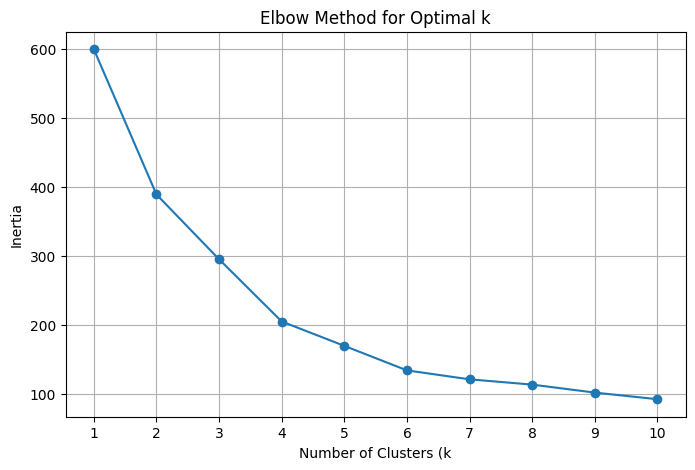

In [7]:
# buatkan model k-means sesuai jumlah cluster optimal
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k")
plt.ylabel("Inertia")
plt.xticks(k_values) 
plt.grid()
plt.show()

In [8]:
# Menggunakan jumlah cluster optimal
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans'] = kmeans.fit_predict(scaled_features)

In [9]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
df.head()

,customer_id,gender,age,annual_income,spending_score,KMeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [10]:
# Menggunakan dimensi data untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [11]:
# buatkan model k-means sesuai jumlah cluster optimal
# warna untuk setiap cluster
colors = ['blue', 'green','red','purple']

Text(0, 0.5, 'spending_score')

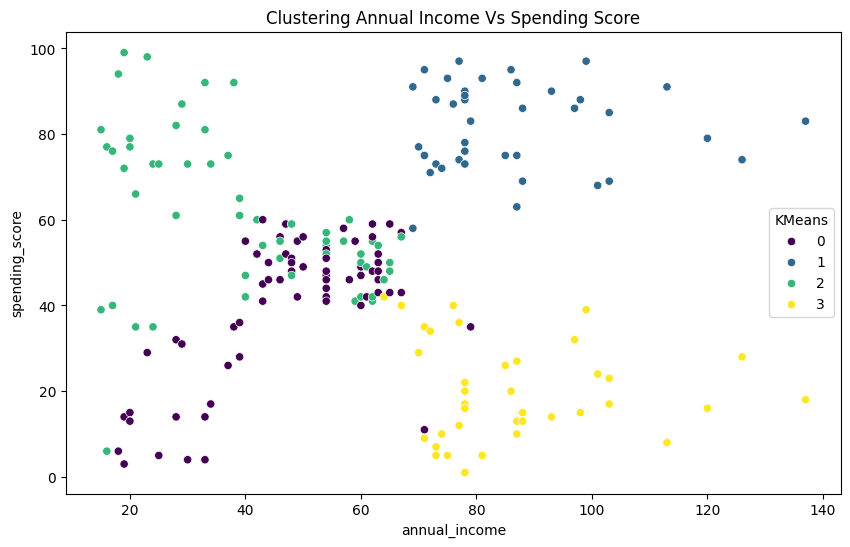

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', 
                hue='KMeans', data=df,
                palette='viridis')
plt.title("Clustering Annual Income Vs Spending Score")
plt.xlabel("annual_income")
plt.ylabel("spending_score")

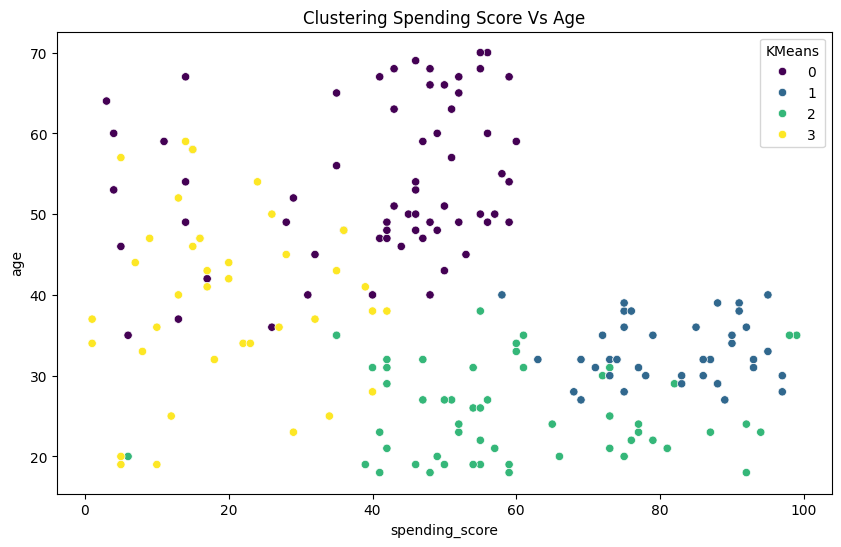

In [13]:
# Plot hasil Clustering Age Vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spending_score', y='age', 
                hue='KMeans', data=df,
                palette='viridis')
plt.title("Clustering Spending Score Vs Age")
plt.xlabel("spending_score")
plt.ylabel("age")
plt.show()

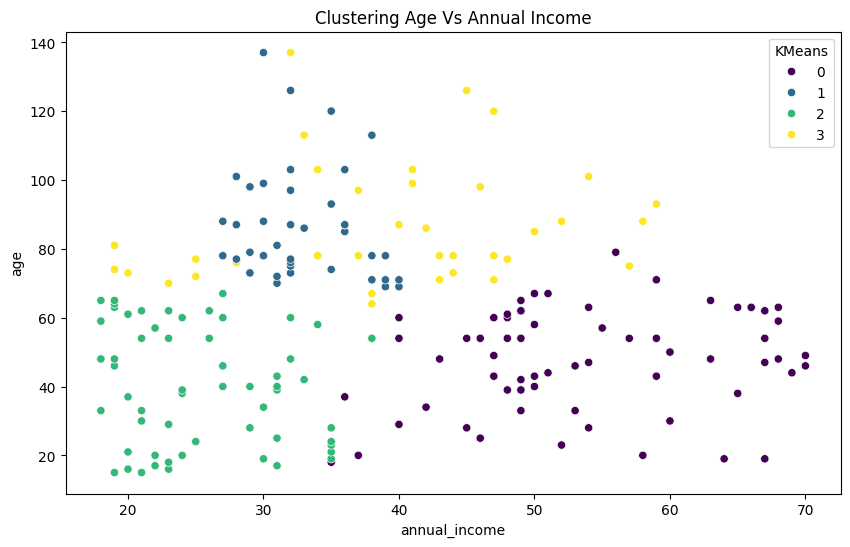

In [14]:
# Plot hasil Clustering Age Vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='annual_income', 
                hue='KMeans', data=df,
                palette='viridis')
plt.title("Clustering Age Vs Annual Income")
plt.xlabel("annual_income")
plt.ylabel("age")
plt.show()

# Hierarchical Clustering

In [15]:
# buatkan plot dendogram dan temukan cluster optimal

In [16]:
# buatkan model Hierarchical CLustering sesuai jumlah cluster optimal
linked =linkage(X_scaled, method='ward')

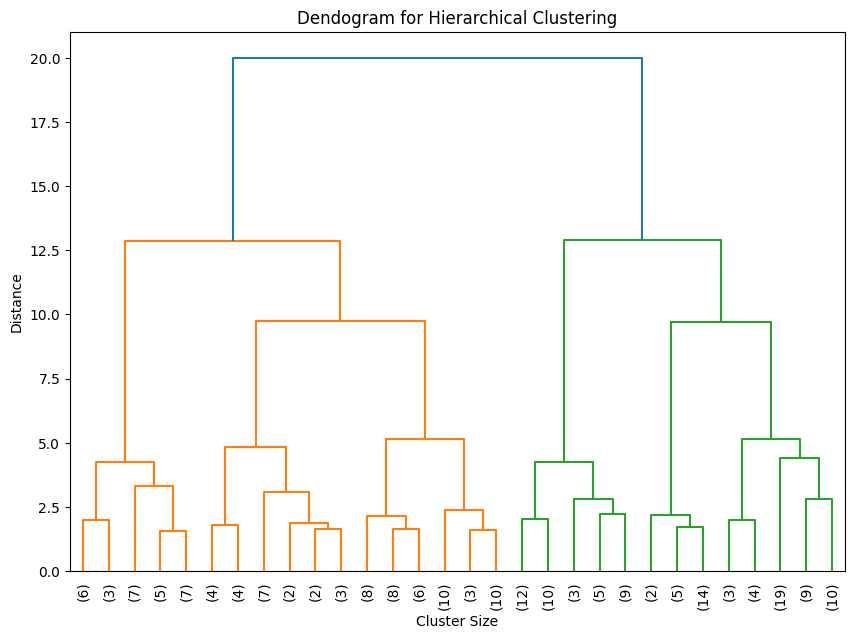

In [17]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure(figsize=(10,7))
plt.title("Dendogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [18]:
HC = cut_tree(linked, n_clusters=3).reshape(-1, )
HC

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
df['HC'] = HC
df.head()

,customer_id,gender,age,annual_income,spending_score,KMeans,HC
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,0


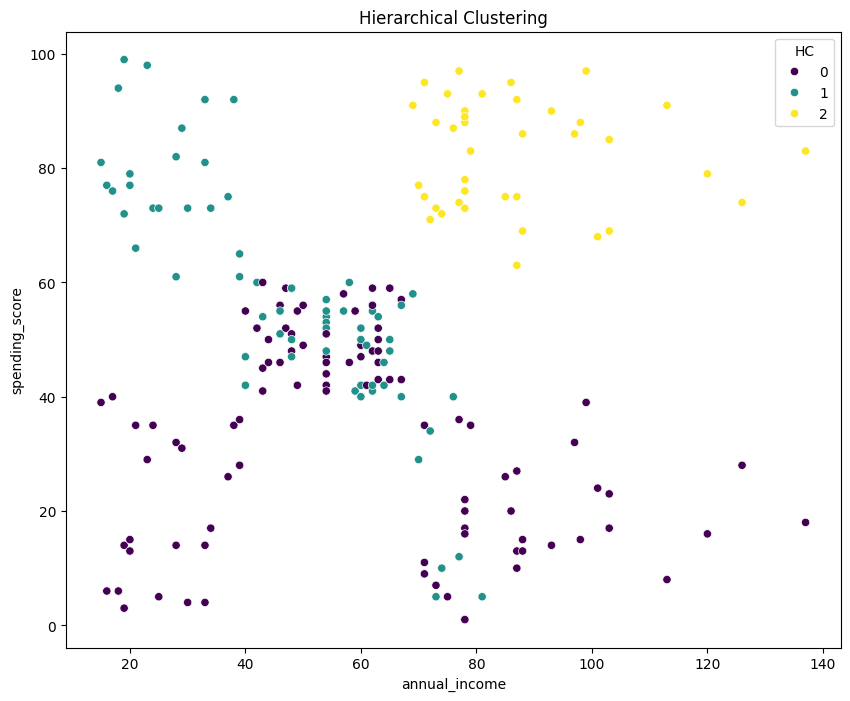

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='HC', palette='viridis')
plt.title("Hierarchical Clustering")
plt.show()

# DBSCAN

In [21]:
# buatkan model DBSCAN dengan nilai eps=0.5 dan min_samples=6

In [22]:
# buatkan kolom untuk memisahkan data anomaly atau bukan anomaly dan buatkan plotnya
dbscan = DBSCAN(eps=0.5, min_samples=6)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score,KMeans,HC,dbscan_cluster
0,1,Male,19,15,39,2,0,-1
1,2,Male,21,15,81,2,1,0
2,3,Female,20,16,6,2,0,-1
3,4,Female,23,16,77,2,1,0
4,5,Female,31,17,40,2,0,-1


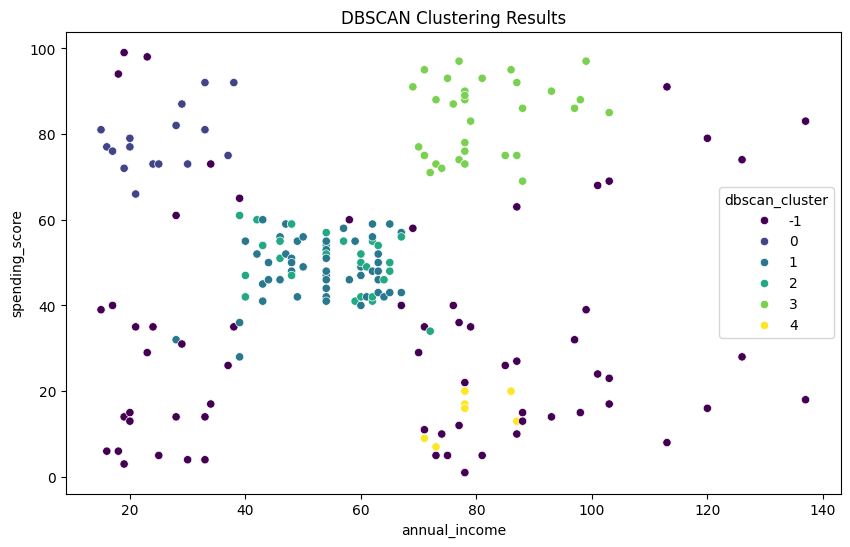

In [24]:
# Plot hasil Cluster
# Membuat bar plot hasil perhitungan Kolom Protocol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', 
                hue='dbscan_cluster', data=df,
                palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

In [25]:
df['anomaly'] = df['dbscan_cluster'] == -1

In [26]:
df.head()

,customer_id,gender,age,annual_income,spending_score,KMeans,HC,dbscan_cluster,anomaly
0,1,Male,19,15,39,2,0,-1,True
1,2,Male,21,15,81,2,1,0,False
2,3,Female,20,16,6,2,0,-1,True
3,4,Female,23,16,77,2,1,0,False
4,5,Female,31,17,40,2,0,-1,True


In [27]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya

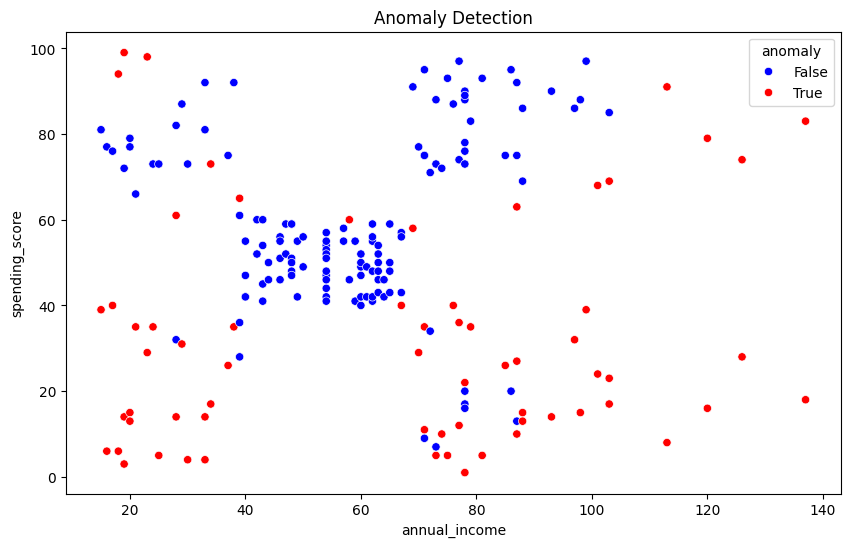

In [28]:
# Plot Hasil Deteksi Anomaly
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', 
                hue='anomaly', data=df,
                palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.show()